### Problem Statement: Mutual Information Classification
i have Write Python script that performs model-based feature selection using Mutual Information
Classification on the "loan" dataset which is downloaded from kaggle.

#### ● Load the dataset using the pandas library or any other suitable method.

In [1]:
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
LoanDataSet = pd.read_csv("data/loan.csv")

In [71]:
LoanDataSet.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
LoanDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
LoanDataSet.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
LoanDataSet.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

####  ● Apply necessary processing on it (Hint : label_encoding , null value handling)

In [12]:
# Now, drop the unneccesary column, and compute the mean of numerial column to replace
# null values... then drop rows which has minimum number of null values....

In [13]:
LoanDataSet.drop('Loan_ID', axis = 1, inplace = True)

In [14]:
LoanDataSet['LoanAmount'] = LoanDataSet['LoanAmount'].fillna(LoanDataSet['LoanAmount'].mean())
LoanDataSet['LoanAmount'].isnull().sum()

0

In [15]:
LoanDataSet['Loan_Amount_Term'] = LoanDataSet['Loan_Amount_Term'].fillna(LoanDataSet['Loan_Amount_Term'].mean())
LoanDataSet['Loan_Amount_Term'].isnull().sum()

0

In [16]:
LoanDataSet

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [17]:
LoanDataSet = LoanDataSet.dropna()
# i have droped the another rows with Null values because there count was minimum..

In [18]:
LoanDataSet

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
# Perform label encoding on categorical columns as a part of data preprocessing
# so that data converted into numberical form, and understandable for ML algorithms...

In [20]:
object_loan_columns_data = LoanDataSet.select_dtypes(include = object)
object_loan_columns_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [21]:
object_loan_columns_array = object_loan_columns_data.values
object_loan_columns_array

array([['Male', 'No', '0', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 'No', 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 'No', 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 'Yes', 'Semiurban', 'N']], dtype=object)

In [22]:

for i in range(object_loan_columns_array.shape[1]): 
    le = LabelEncoder()
    Unique_labels = set(object_loan_columns_array[:,i])
    Unique_labels = list(Unique_labels)
    Unique_labels = np.array(Unique_labels)
    le.fit(Unique_labels)
    object_loan_columns_array[:,i] = le.transform(object_loan_columns_array[:,i])

In [23]:
object_loan_columns_array

array([[1, 0, 0, ..., 0, 2, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 2, 1],
       ...,
       [1, 1, 1, ..., 0, 2, 1],
       [1, 1, 2, ..., 0, 2, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=object)

In [24]:
object_loan_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         511 non-null    object
 1   Married        511 non-null    object
 2   Dependents     511 non-null    object
 3   Education      511 non-null    object
 4   Self_Employed  511 non-null    object
 5   Property_Area  511 non-null    object
 6   Loan_Status    511 non-null    object
dtypes: object(7)
memory usage: 31.9+ KB


In [25]:
# convertion of Object Datatype column to Int datatype
for colname in object_loan_columns_data.columns:
    object_loan_columns_data[colname] = object_loan_columns_data[colname].astype(int)

In [26]:
object_loan_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender         511 non-null    int64
 1   Married        511 non-null    int64
 2   Dependents     511 non-null    int64
 3   Education      511 non-null    int64
 4   Self_Employed  511 non-null    int64
 5   Property_Area  511 non-null    int64
 6   Loan_Status    511 non-null    int64
dtypes: int64(7)
memory usage: 31.9 KB


In [27]:
# Select Only int and float data type columns from dataset

In [28]:
int_float_loan_columns_data = LoanDataSet.select_dtypes(include = [int, float])
int_float_loan_columns_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [29]:
FinalLoanDataSet = pd.concat([int_float_loan_columns_data,
                              object_loan_columns_data], axis =1)

In [30]:
FinalLoanDataSet

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,3,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,2,1
612,7583,0.0,187.000000,360.0,1.0,1,1,2,0,0,2,1


#### ● Separate the features (X) and the target variable (y : Loan_Status) from the dataset.

In [31]:
# Then implement Mutual information Classification on Cleaned Housing Data Set
set(FinalLoanDataSet.Loan_Status)

{0, 1}

In [32]:
X_Loan = FinalLoanDataSet.drop('Loan_Status', axis = 1).values
# Independent Variable contains all column values except Loan Status

In [33]:
Y_Loan = FinalLoanDataSet.Loan_Status.values
# dependent variable loan status...  

In [34]:
MicLoanDataset = mutual_info_classif(X_Loan, Y_Loan, random_state = 1)
# pass X, Y values to mutual_info_classifier Object

In [35]:
#help(mutual_info_classif)

In [36]:
MicLoanDataset.shape

(11,)

In [37]:
loanDataSeries = pd.Series(MicLoanDataset) 
# convert 1d data into series... 
loanDataSeries 
# this series contains MIC score value of independent variables

0     0.009821
1     0.000000
2     0.008270
3     0.012135
4     0.124372
5     0.000000
6     0.000000
7     0.000000
8     0.005962
9     0.000000
10    0.000000
dtype: float64

In [38]:
FinalLoanDataSet.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
FinalLoanDataSet.columns[:-1]

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [40]:
IndependentLoanVariables = FinalLoanDataSet.columns[:-1]

In [41]:
IndependentLoanVariables

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [42]:
loanDataSeries.index = IndependentLoanVariables
# provide index name to series object from independent variable 
# columns for more readability
loanDataSeries

ApplicantIncome      0.009821
CoapplicantIncome    0.000000
LoanAmount           0.008270
Loan_Amount_Term     0.012135
Credit_History       0.124372
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.005962
Self_Employed        0.000000
Property_Area        0.000000
dtype: float64

In [43]:
loanDataSeries.sort_values(ascending= True)

CoapplicantIncome    0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Self_Employed        0.000000
Property_Area        0.000000
Education            0.005962
LoanAmount           0.008270
ApplicantIncome      0.009821
Loan_Amount_Term     0.012135
Credit_History       0.124372
dtype: float64

In [44]:
loanDataSeries.index

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [45]:
# convert data inside series to dataframe. so that we can plot graph from it... 
MicScoresDataset = pd.DataFrame({'Features' : loanDataSeries.index,
                                'MicScore' : loanDataSeries.values})
MicScoresDataset

,Features,MicScore
0,ApplicantIncome,0.009821
1,CoapplicantIncome,0.000000
2,LoanAmount,0.008270
3,Loan_Amount_Term,0.012135
4,Credit_History,0.124372
5,Gender,0.000000
6,Married,0.000000
7,Dependents,0.000000
8,Education,0.005962
9,Self_Employed,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ApplicantIncome'),
  Text(1, 0, 'CoapplicantIncome'),
  Text(2, 0, 'LoanAmount'),
  Text(3, 0, 'Loan_Amount_Term'),
  Text(4, 0, 'Credit_History'),
  Text(5, 0, 'Gender'),
  Text(6, 0, 'Married'),
  Text(7, 0, 'Dependents'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Self_Employed'),
  Text(10, 0, 'Property_Area')])

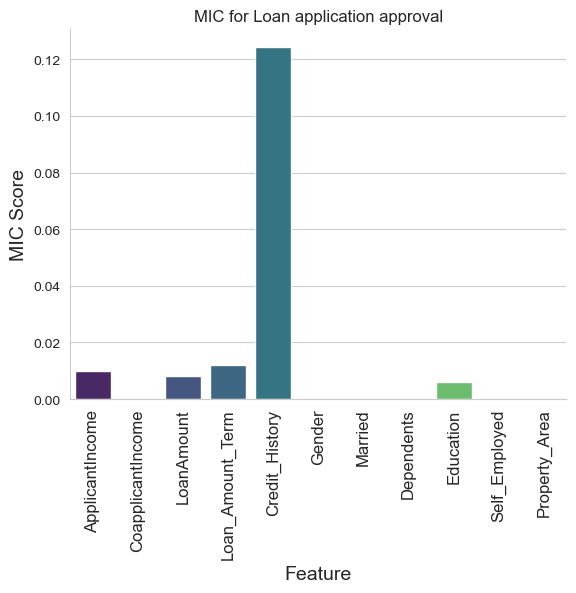

In [46]:
sns.set_style('whitegrid')
sns.barplot(x = 'Features' , y = 'MicScore', data = MicScoresDataset, palette = 'viridis')
sns.despine()
plt.title('MIC for Loan application approval')
plt.xlabel('Feature' , fontsize = 14)
plt.ylabel("MIC Score" , fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)

#### ● Use the SelectKBest class from the sklearn.feature_selection module to select the top K features based on mutual information scores.

In [47]:
FinalLoanDataSet.columns # display columns from Dataset

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
X_Loan = FinalLoanDataSet[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area']]
# independent variables

In [49]:
y_Loan = FinalLoanDataSet['Loan_Status']
# dependent variable

In [50]:
# split data in training and test set with random state 42 and 80%- 20%
X_train_Loan, X_test_Loan, y_train_Loan, y_test_Loan = train_test_split(
    X_Loan, y_Loan, test_size=0.2, random_state=1)


In [51]:
print("Number of Features before SelectKBest:", X_train_Loan.shape[1])

Number of Features before SelectKBest: 11


####  ● Choose an appropriate value of K (number of features to select) for the analysis.

####  ● Fit the feature selection model on the dataset and transform the feature matrix accordingly

In [52]:
np.random.seed(1)
selectKLoanBestObj = SelectKBest(k=5, score_func=mutual_info_classif)
selectKLoanBestObj.fit(X_train_Loan, y_train_Loan)
# i have selected 4 Best columns with scoreing function values as mutual_info_classif

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x11031cc20>)

In [53]:
# help(SelectKBest)

● Print the names or indices of the selected features.

In [54]:
kBestLoanColumnIndex = selectKLoanBestObj.get_support(indices=True)
kBestLoanColumnIndex

array([ 4,  5,  6,  8, 10])

In [55]:
dataFrameWithNewLoanColumns = FinalLoanDataSet.iloc[:,kBestLoanColumnIndex]
dataFrameWithNewLoanColumns

,Credit_History,Gender,Married,Education,Property_Area
0,1.0,1,0,0,2
1,1.0,1,1,0,0
2,1.0,1,1,0,2
3,1.0,1,1,1,2
4,1.0,1,0,0,2
...,...,...,...,...,...
609,1.0,0,0,0,0
610,1.0,1,1,0,0
611,1.0,1,1,0,2
612,1.0,1,1,0,2


[Text(0, 0, '331'), Text(0, 0, '180')]

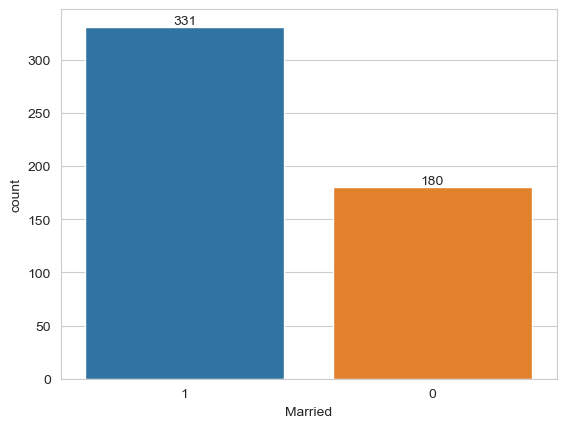

In [56]:
 #plot count plot of Self_Employed column to display number of emloyeed or not count
ax = sns.countplot(x=dataFrameWithNewLoanColumns['Married'],
                  order=dataFrameWithNewLoanColumns['Married'].value_counts(ascending=False).index);

abs_values = dataFrameWithNewLoanColumns['Married'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

[Text(0, 0, '401'), Text(0, 0, '110')]

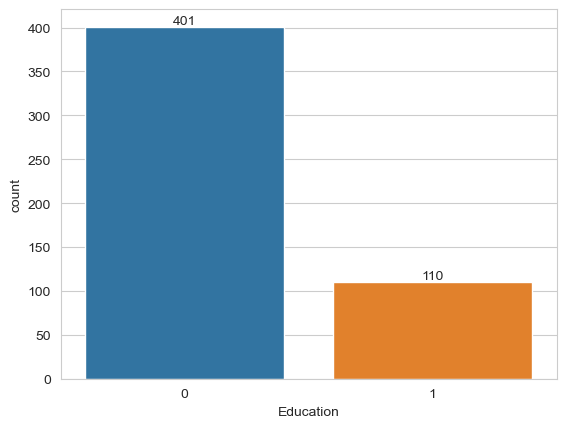

In [57]:
# then count plot to show number of Credit_History count of Credit_History column
ax = sns.countplot(x=dataFrameWithNewLoanColumns['Education'],
                   order=dataFrameWithNewLoanColumns['Education'].value_counts(ascending=False).index);

abs_values = dataFrameWithNewLoanColumns['Education'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)



In [58]:
# implememting different ML algorithms for checking the accouracy of model

In [59]:
dataFrameWithNewLoanColumns.columns

Index(['Credit_History', 'Gender', 'Married', 'Education', 'Property_Area'], dtype='object')

In [60]:
X_Loan_model = dataFrameWithNewLoanColumns[['Credit_History', 'Gender', 'Married', 'Education', 'Property_Area']]

In [61]:
Y_Loan_model =  FinalLoanDataSet['Loan_Status']

In [62]:
X_train_Loan , X_test_Loan , y_train_Loan , y_test_Loan = train_test_split(X_Loan_model, Y_Loan_model, test_size=0.2)

In [63]:
X_train_Loan

,Credit_History,Gender,Married,Education,Property_Area
484,1.0,1,1,0,1
400,0.0,1,1,1,2
319,1.0,1,1,0,0
164,1.0,1,1,0,2
72,1.0,1,0,0,1
...,...,...,...,...,...
159,1.0,1,1,0,1
527,0.0,1,1,1,1
261,1.0,1,0,0,1
250,0.0,1,1,1,1


In [64]:
X_test_Loan

,Credit_History,Gender,Married,Education,Property_Area
457,1.0,1,1,0,2
548,0.0,0,0,0,1
87,1.0,1,1,0,1
191,1.0,1,0,0,1
434,1.0,1,0,0,2
...,...,...,...,...,...
113,1.0,0,0,0,1
88,1.0,1,0,0,2
475,1.0,1,1,0,0
35,1.0,1,1,0,2


In [65]:
K_CLF_Loan = KNeighborsClassifier(n_neighbors=2)
K_CLF_Loan.fit(X_train_Loan,y_train_Loan)
y_pred_Loan_CLF = K_CLF_Loan.predict(X_test_Loan)
accuracy_score(y_test_Loan,y_pred_Loan_CLF)

0.5533980582524272

In [66]:
clf_tree_Loan =  DecisionTreeClassifier(criterion="entropy")

In [67]:
clf_tree_Loan.fit(X_train_Loan,y_train_Loan) #training

DecisionTreeClassifier(criterion='entropy')

In [68]:
y_pred_Loan_tree = clf_tree_Loan.predict(X_test_Loan)

In [69]:
accuracy_score(y_pred_Loan_tree,y_test_Loan)

0.8252427184466019